In [1]:
from data import load_data, categorize_metadata, process_experiments
import pandas as pd
import numpy as np
import os

In [2]:
metadata_train, experiments_train = load_data(os.path.join("..", "data", "train"), "")
truth_train, metadata_train = categorize_metadata(metadata_train)
metadata_test, experiments_test = load_data(os.path.join("..", "data", "test"), "")
truth_test, metadata_test = categorize_metadata(metadata_test)

In [3]:
from sklearn.model_selection import train_test_split
processed_train = process_experiments(experiments_train, baseline_lam=10, baseline_p=1e-2, smooth_window_length=7, smooth_polyorder=3)
X_train = pd.concat([metadata_train, processed_train], axis=1)
processed_test = process_experiments(experiments_test, baseline_lam=10, baseline_p=1e-2, smooth_window_length=7, smooth_polyorder=3)
X_test = pd.concat([metadata_test, processed_test], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': range(1, 201, 50),
    'max_depth': range(10, 11, 10)
}

clf = RandomForestClassifier()

grid_clf = GridSearchCV(clf, param_grid, cv=20)
grid_clf.fit(X_train, truth_train.to_numpy().ravel())

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 11, 10),
                         'n_estimators': range(1, 201, 50)})

In [6]:
grid_clf.cv_results_

{'mean_fit_time': array([0.02515169, 0.81249317, 1.44318742, 2.0558908 ]),
 'std_fit_time': array([0.00768036, 0.233411  , 0.24691436, 0.13221224]),
 'mean_score_time': array([0.        , 0.00578324, 0.00520812, 0.00942556]),
 'std_score_time': array([0.        , 0.00711642, 0.00715995, 0.00759582]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 51, 101, 151],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'n_estimators': 1},
  {'max_depth': 10, 'n_estimators': 51},
  {'max_depth': 10, 'n_estimators': 101},
  {'max_depth': 10, 'n_estimators': 151}],
 'split0_test_score': array([0.77777778, 1.        , 1.        , 1.        ]),
 'split1_test_score': array([0.77777778, 1.        , 1.        , 1.        ]),
 'split2_test_score': array([0.74074074, 1.   

RuntimeError: Error in qhull Delaunay triangulation calculation: input inconsistency (exitcode=1); use python verbose option (-v) to see original qhull error.

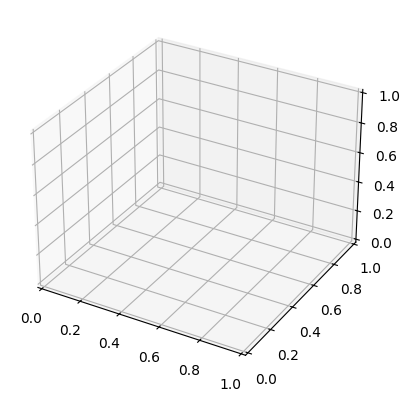

In [7]:
import matplotlib.pyplot as plt
z = grid_clf.cv_results_['mean_test_score']
x = list(map(lambda x: x['max_depth'], grid_clf.cv_results_['params']))
y = list(map(lambda x: x['n_estimators'], grid_clf.cv_results_['params']))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
_ = ax.plot_trisurf(x, y, z)


In [8]:
from sklearn.model_selection import cross_val_score

for polyorder in range(3, 25, 2):
    processed_train = process_experiments(experiments_train, baseline_lam=10, baseline_p=1e-2, smooth_window_length=polyorder+2, smooth_polyorder=polyorder)
    X_train = pd.concat([metadata_train, processed_train], axis=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    clf = RandomForestClassifier()
    print(polyorder, np.mean(cross_val_score(clf, X_train, truth_train.to_numpy().ravel(), cv=10)))
        

3 0.9468795355587808
5 0.9430696661828737
7 0.9431785195936138
9 0.9469158200290275
11 0.9526487663280117
13 0.9336357039187227
15 0.9488026124818576
17 0.9449927431059505


C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:1

19 0.9166182873730044


C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:1

21 0.928011611030479


C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:193: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(np.arange(0, window_stop - window_start),
C:\Users\Ed\Desktop\Programming\RamanClassifier\venv\Lib\site-packages\scipy\signal\_savitzky_golay.py:1

23 0.928011611030479


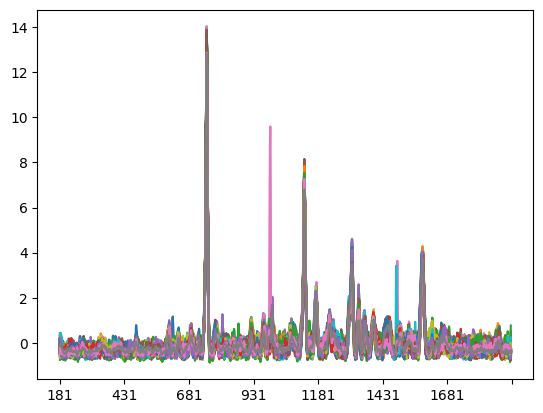

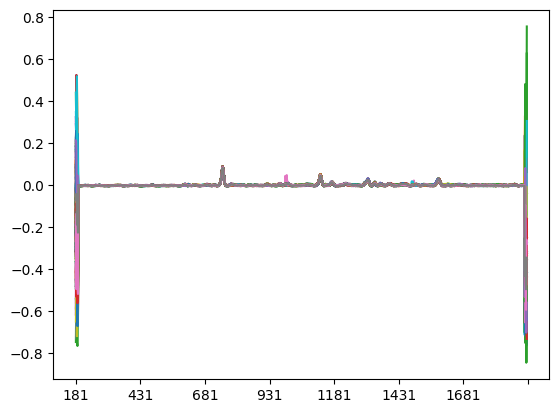

In [9]:
temp = process_experiments(experiments_train, baseline_lam=10, baseline_p=1e-2, smooth_window_length=7, smooth_polyorder=3)
_ = temp.transpose().plot(legend=False)
temp = process_experiments(experiments_train, baseline_lam=10, baseline_p=1e-2, smooth_window_length=19, smooth_polyorder=17)
_ = temp.transpose().plot(legend=False)

In [14]:
for droprate in [1, 2, 3, 5, 10, 20, 50, 100, 200, 500, 1000]:
    dropped_train = experiments_train.iloc[:, ::droprate]
    processed_train = process_experiments(dropped_train, baseline_lam=10, baseline_p=1e-2, smooth_window_length=7, smooth_polyorder=3)
    X_train = pd.concat([metadata_train, processed_train], axis=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    clf = RandomForestClassifier()
    print(droprate, dropped_train.shape, np.mean(cross_val_score(clf, X_train, truth_train.to_numpy().ravel(), cv=10)))

1 (528, 1746) 0.9563134978229317
2 (528, 873) 0.9583454281567487
3 (528, 582) 0.9526124818577649
5 (528, 350) 0.9489477503628446
10 (528, 175) 0.9659288824383163
20 (528, 88) 0.9678156748911466
50 (528, 35) 0.9546081277213352
100 (528, 18) 0.9205370101596516
200 (528, 9) 0.9148403483309144


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [15]:
clf = RandomForestClassifier()
print(np.mean(cross_val_score(clf, 0*X_train, truth_train.to_numpy().ravel(), cv=10)))

0.35420899854862115
